##### Questoin > Supervisor > LLM Or RAG 

In [2]:
pip install langchain_groq sentence_transformers faiss-cpu pydantic python-dotenv pypdf bs4 langchain langchain_core langchain-community langchain_huggingface langchain_google_genai langchain-pinecone langgraph langchain-openai langchain_groq langchain_google_genai google-generativeai  pymupdf wikipedia arxiv defusedxml  youtube_search langchain-tavily langgraph chromadb langchain[chromadb]


zsh:1: no matches found: langchain[chromadb]
Note: you may need to restart the kernel to use updated packages.


In [3]:
#### import
import os
from dotenv import load_dotenv
from langgraph.graph import Graph
from IPython.display import Image, display
load_dotenv()


True

In [4]:
#from langchain_google_genai import ChatGoogleGenerativeAI
#model=ChatGoogleGenerativeAI(model='models/gemini-1.5-flash')
from langchain_groq import ChatGroq
model= ChatGroq(model="deepseek-r1-distill-llama-70b")
output=model.invoke('Great Day !! ')
print(output.content)

<think>

</think>

Great day to you too! How can I assist you today?


#### Configure the embdeeing Model

In [5]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("Hi"))

/Users/anvvsharma/anvv/ws/agenticai/vagenticai/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

##### Lets take a Data embedd it and store in Vector Database

In [6]:
##### Imports
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
import operator
from langchain_core.tools import tool
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END,MessagesState,START
from langgraph.prebuilt import ToolNode


In [18]:
def call_model(state: MessagesState):
    message = state['messages'][-1]
    if isinstance(message, HumanMessage):
        question_text = message.content
    else:
        question_text = str(message)
    question = HumanMessage(content=question_text)
    print(f"This is your question message: {question}")
    response = model.invoke([question])
    
    return {"messages": [response.content]}

In [12]:
state = {"messages": ["how are you doing today !! "]}
call_model(state)

this is your question message: content='how are you doing today !! ' additional_kwargs={} response_metadata={}


{'messages': ['<think>\nOkay, the user asked, "how are you doing today !! " with some exclamation points. They seem energetic and friendly.\n\nI should respond in a positive way to match their tone. Maybe start with a greeting.\n\nI can mention that I\'m just a computer program, so I don\'t have feelings, but I\'m here and ready to help.\n\nI should ask them how they\'re doing as well to keep the conversation going.\n\nMaybe add an emoji to keep it friendly and approachable.\n</think>\n\nHello! I\'m just a computer program, so I don\'t have feelings, but I\'m here and ready to help you with whatever you need. How are *you* doing today? 😊']}

In [13]:
workflow=StateGraph(MessagesState)


In [16]:
mybot = "My Simple Bot"
workflow=StateGraph(MessagesState)
workflow.add_node(mybot,call_model)
workflow.add_edge(START, mybot)
workflow.add_edge(mybot, END)
app = workflow.compile()

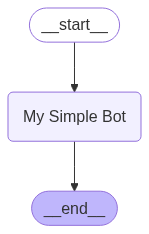

In [17]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))